In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

#### Loading Dataset

In [2]:
df = pd.read_csv("C:\\Users\\bikki\\Downloads\\Diabetes.csv")

## **Data Pre-Processing**

### 3.1 Data Inspection and Summary Statistics

In [3]:
df.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Outcome
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0    Number of times pregnant      768 non-null    int64  
 1    Plasma glucose concentration  768 non-null    int64  
 2    Diastolic blood pressure      768 non-null    int64  
 3    Triceps skin fold thickness   768 non-null    int64  
 4    2-Hour serum insulin          768 non-null    int64  
 5    Body mass index               768 non-null    float64
 6    Diabetes pedigree function    768 non-null    float64
 7    Age (years)                   768 non-null    int64  
 8   Outcome                        768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [5]:
df.shape

(768, 9)

In [6]:
df = df.rename(columns={
    ' Number of times pregnant': 'Pregnancies',
    ' Plasma glucose concentration': 'Glucose',
    ' Diastolic blood pressure': 'Blood_Pressure',
    ' Triceps skin fold thickness': 'Skin_Thickness',
    ' 2-Hour serum insulin': 'Insulin',
    ' Body mass index': 'BMI',
    ' Diabetes pedigree function': 'Diabetes_Pedigree_Function',
    ' Age (years)': 'Age'
})

### 3.2 Data Cleaning and Feature Engineering

In [7]:
df.isnull().sum()

Pregnancies                   0
Glucose                       0
Blood_Pressure                0
Skin_Thickness                0
Insulin                       0
BMI                           0
Diabetes_Pedigree_Function    0
Age                           0
Outcome                       0
dtype: int64

In [8]:
print(df.duplicated().sum())

0


### Encoding Categorical Variables

In [9]:
df['Outcome'] = df['Outcome'].map({'YES': 1, 'NO': 0})

In [10]:
x= df.drop('Outcome', axis=1)  
y= df['Outcome']  

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)

In [12]:
print(x_scaled_df.head())

   Pregnancies   Glucose  Blood_Pressure  Skin_Thickness   Insulin       BMI  \
0     0.639947  0.848324        0.149641        0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396       -0.160546        0.530902 -0.692891 -0.684422   
2     1.233880  1.943724       -0.263941       -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208       -0.160546        0.154533  0.123302 -0.494043   
4    -1.141852  0.504055       -1.504687        0.907270  0.765836  1.409746   

   Diabetes_Pedigree_Function       Age  
0                    0.468492  1.425995  
1                   -0.365061 -0.190672  
2                    0.604397 -0.105584  
3                   -0.920763 -1.041549  
4                    5.484909 -0.020496  


In [13]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

Processing column: Glucose


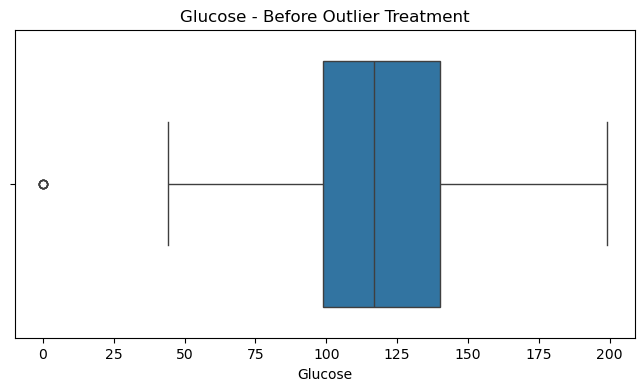

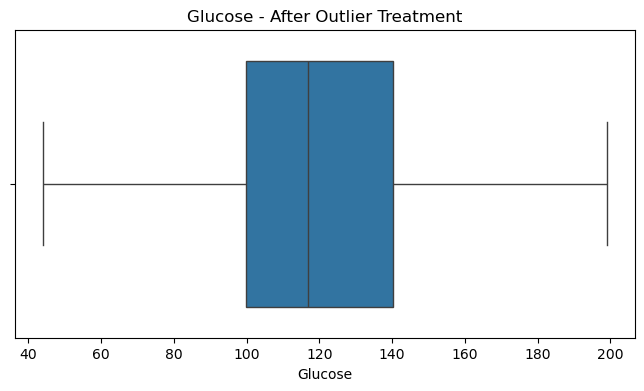

Processing column: Skin_Thickness


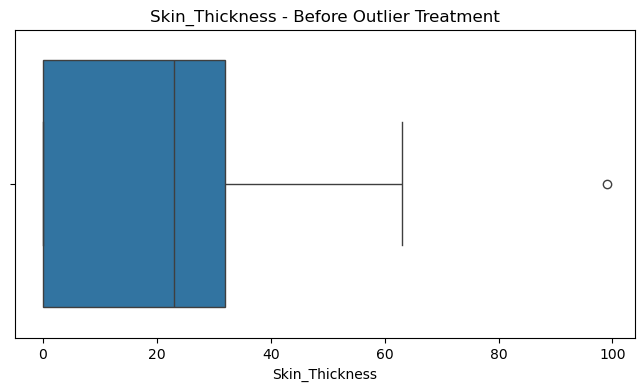

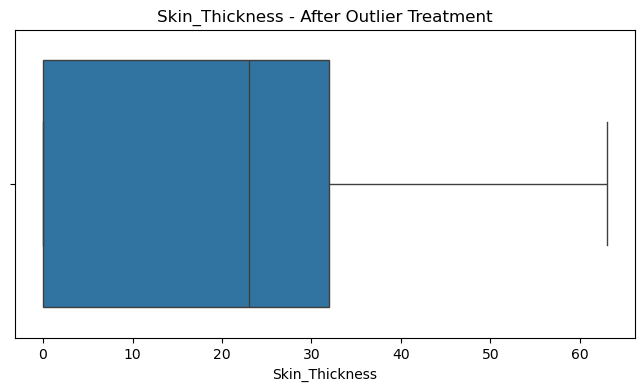

Processing column: Blood_Pressure


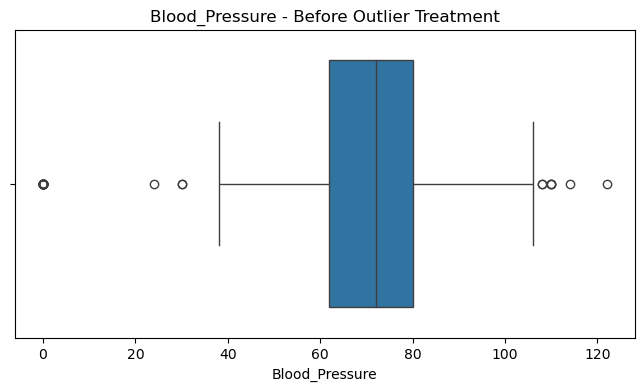

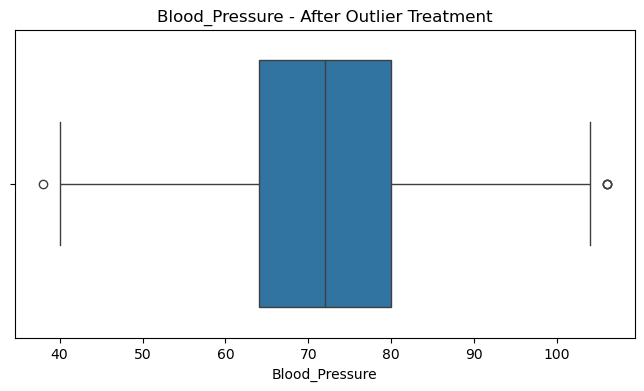

Processing column: Insulin


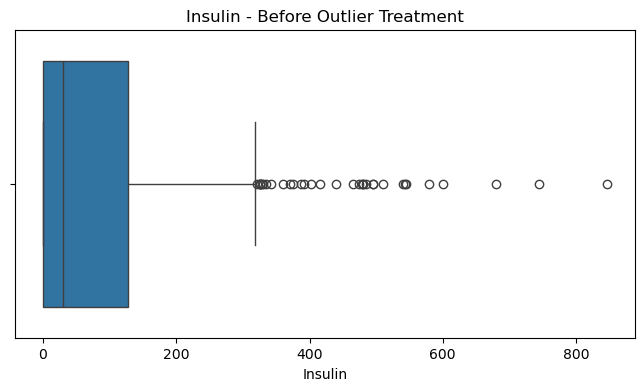

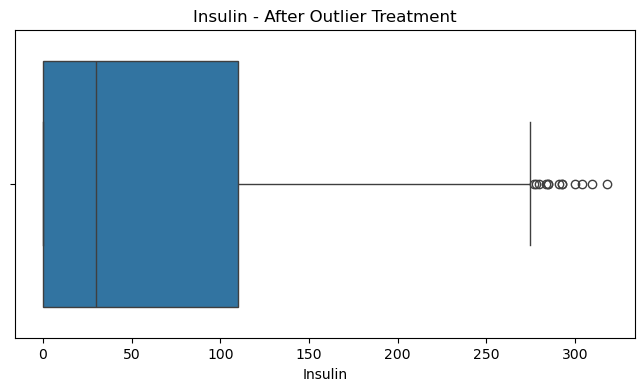

Processing column: BMI


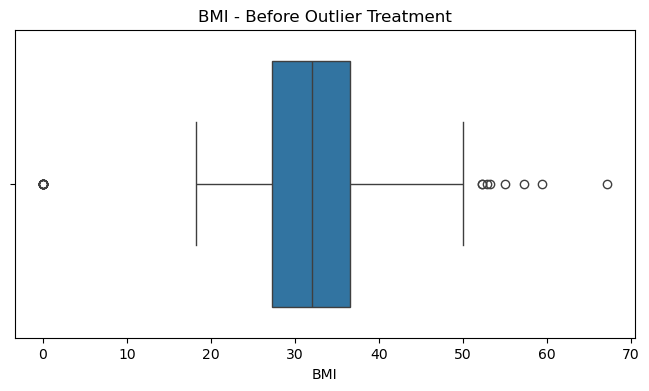

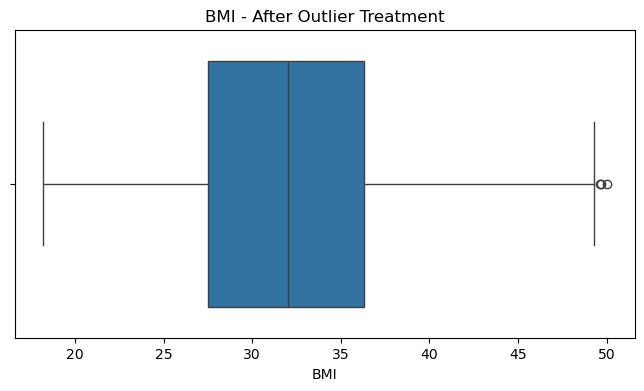

Processing column: Diabetes_Pedigree_Function


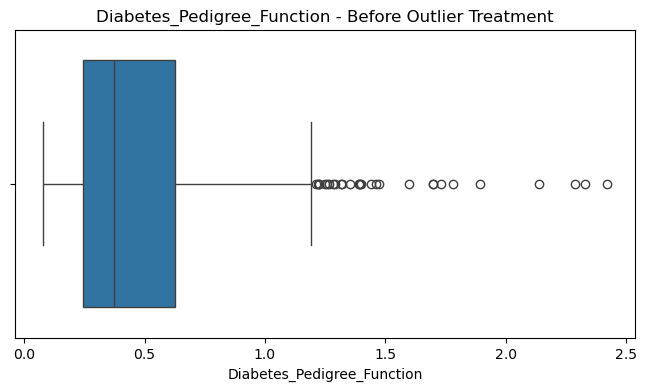

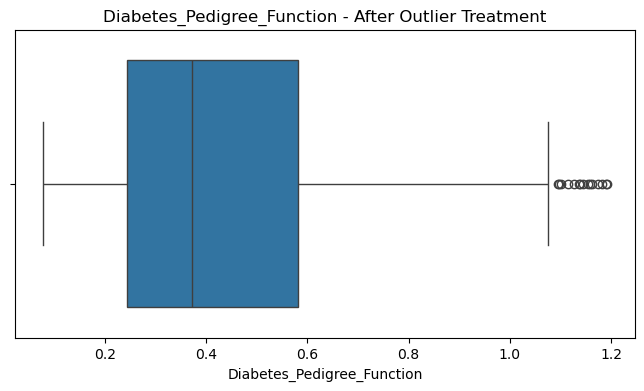

In [14]:
# Function for outlier detection and treatment
def outlier_treatment(df):
    # Specified columns for outlier treatment
    specified_columns = ["Glucose", "Skin_Thickness", "Blood_Pressure", "Insulin", "BMI", "Diabetes_Pedigree_Function"]
    
    for column in specified_columns:
        print(f"Processing column: {column}")
        
        # Box plot before treatment
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[column])
        plt.title(f"{column} - Before Outlier Treatment")
        plt.show()
        
        # Calculate IQR, lower and upper bounds
        Q1 = df[column].quantile(0.25)  
        Q3 = df[column].quantile(0.75)  
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with the median
        median_value = df[column].median()
        df[column] = df[column].apply(
            lambda x: median_value if x < lower_bound or x > upper_bound else x
        )
        
        # Box plot after treatment
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[column])
        plt.title(f"{column} - After Outlier Treatment")
        plt.show()
    
    return df

df_cleaned = outlier_treatment(df)

## 4. Exploratory Data Analysis (EDA)

### 4.1 Summary Statistics

In [15]:
df.describe()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.196615,20.437500,60.919271,32.198958,0.427667,33.240885,0.348958
std,3.369578,30.438286,11.146723,15.698554,77.635666,6.410558,0.245162,11.760232,0.476951
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,29.750000,32.000000,0.371750,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,110.000000,36.300000,0.582250,41.000000,1.000000
max,17.000000,199.000000,106.000000,63.000000,318.000000,50.000000,1.191000,81.000000,1.000000


### 4.2 Univariate Analysis

#### Univariate Numerical Analysis


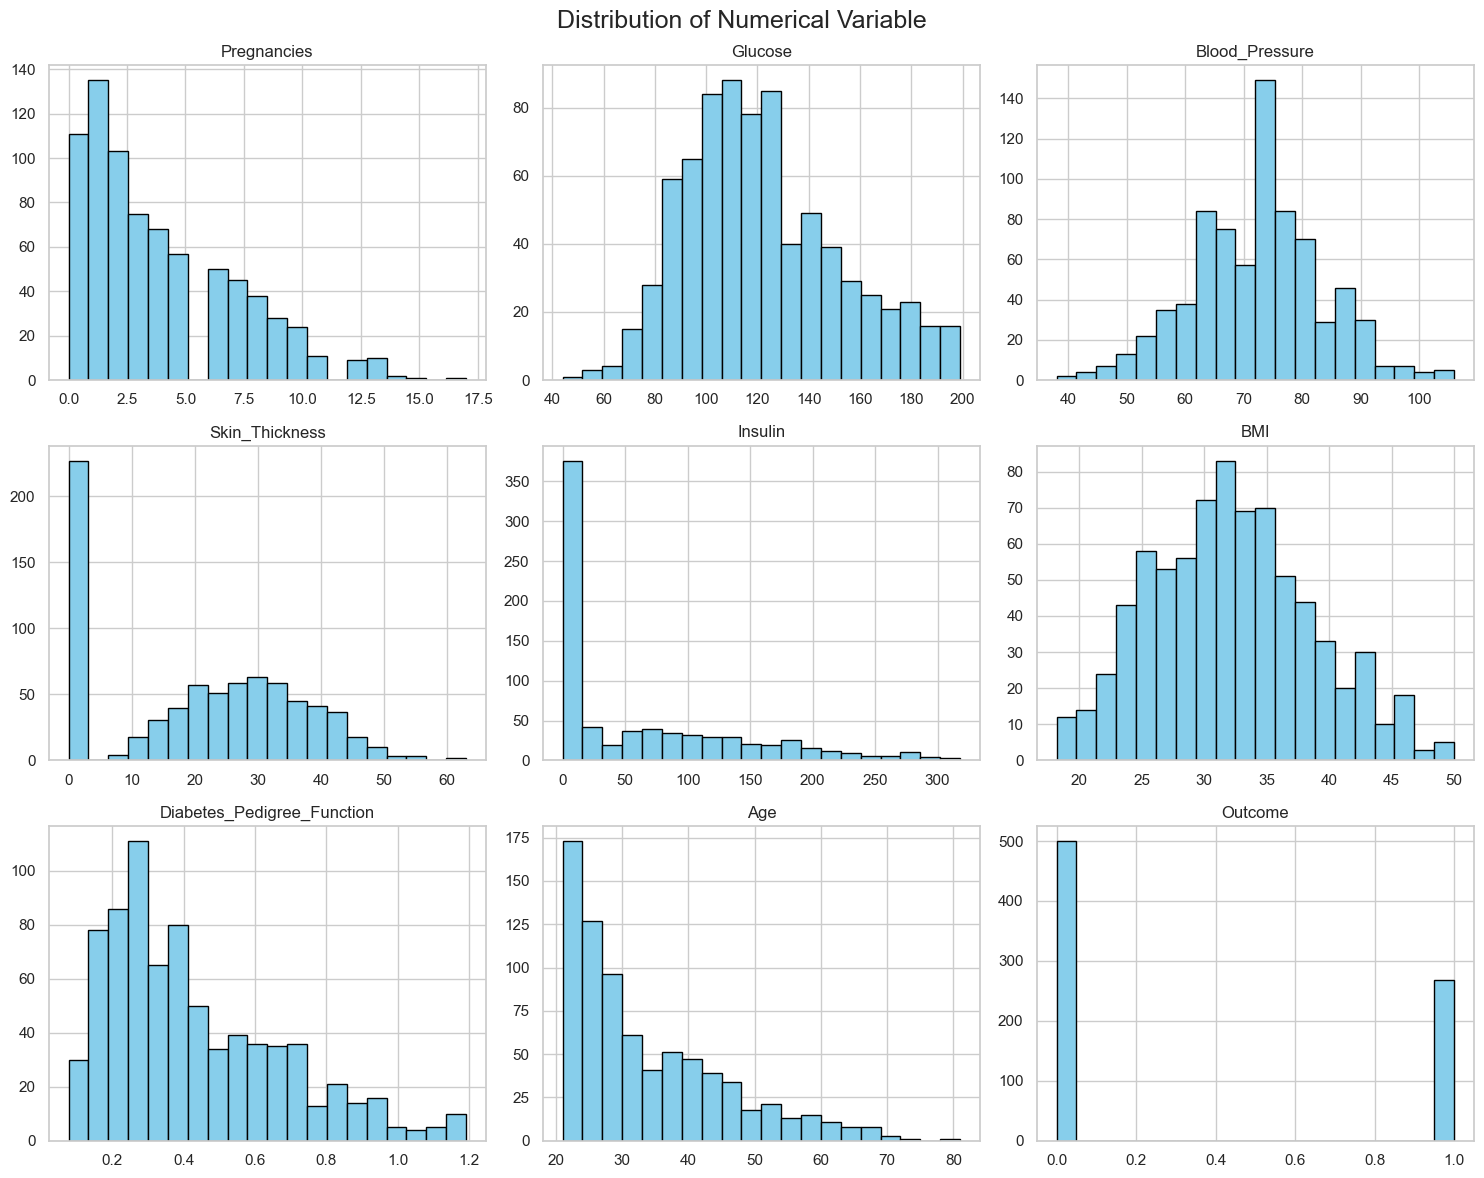

In [16]:
sns.set(style='whitegrid')

# Ploting histogram for all numeric columns

df.hist(figsize=(15, 12),bins=20,color='skyblue',edgecolor='black')
plt.suptitle('Distribution of Numerical Variable',fontsize=18)
plt.tight_layout()
plt.show()

### 4.3 Bivariate Analysis

C:\Users\bikki\AppData\Local\Temp\ipykernel_2452\2536566705.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, palette='Set2')


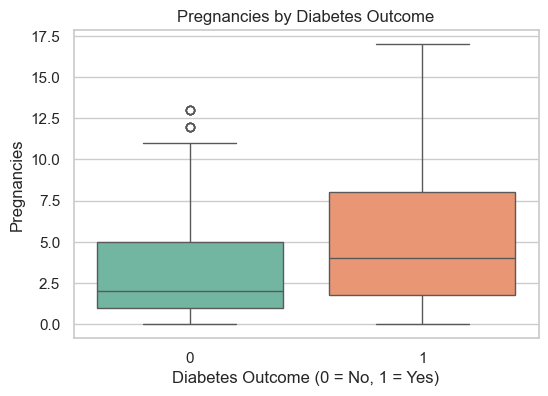

C:\Users\bikki\AppData\Local\Temp\ipykernel_2452\2536566705.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, palette='Set2')


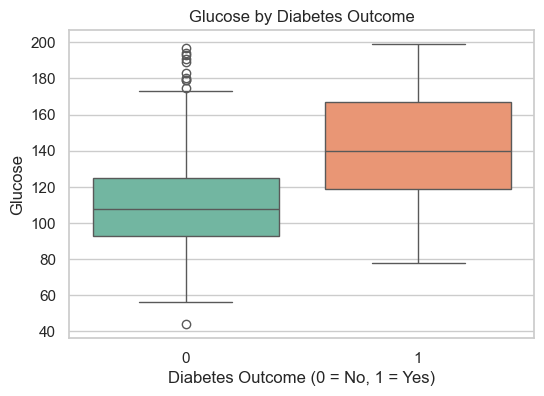

C:\Users\bikki\AppData\Local\Temp\ipykernel_2452\2536566705.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, palette='Set2')


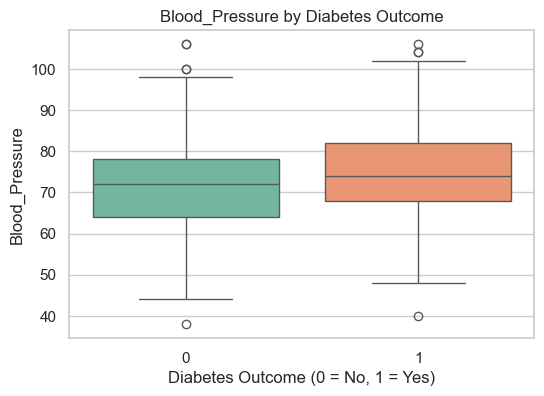

C:\Users\bikki\AppData\Local\Temp\ipykernel_2452\2536566705.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, palette='Set2')


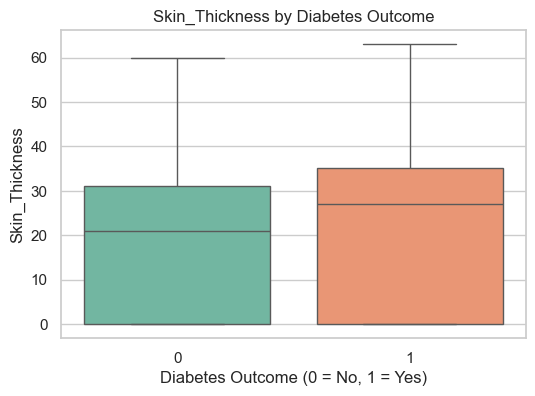

C:\Users\bikki\AppData\Local\Temp\ipykernel_2452\2536566705.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, palette='Set2')


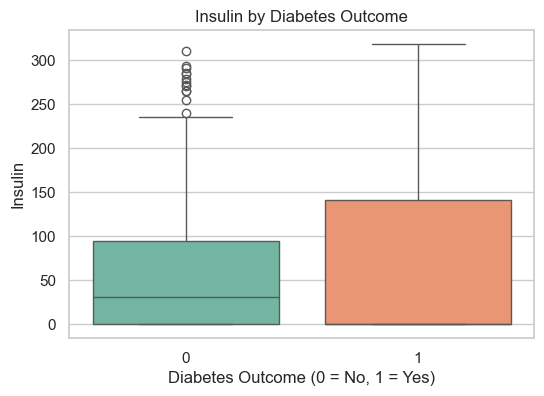

C:\Users\bikki\AppData\Local\Temp\ipykernel_2452\2536566705.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, palette='Set2')


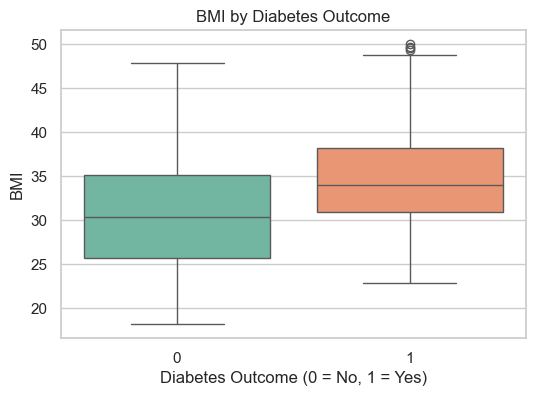

C:\Users\bikki\AppData\Local\Temp\ipykernel_2452\2536566705.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, palette='Set2')


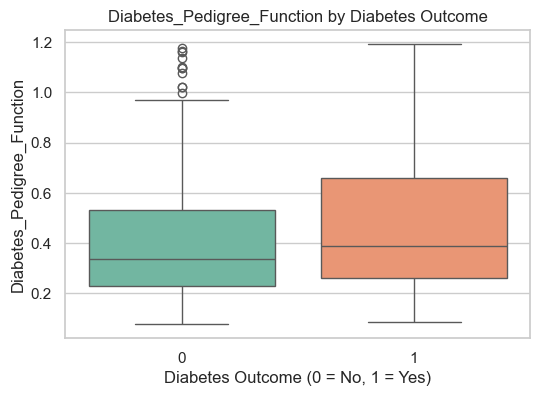

C:\Users\bikki\AppData\Local\Temp\ipykernel_2452\2536566705.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, palette='Set2')


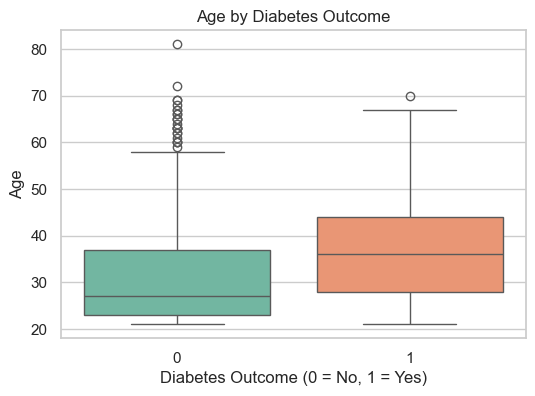

In [17]:
features = df.columns[:-1]  # exclude Outcome

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Outcome', y=feature, data=df, palette='Set2')
    plt.title(f"{feature} by Diabetes Outcome")
    plt.xlabel("Diabetes Outcome (0 = No, 1 = Yes)")
    plt.ylabel(feature)
    plt.show()

C:\Users\bikki\AppData\Local\Temp\ipykernel_2452\1435935296.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome',data=df,palette='Set2')


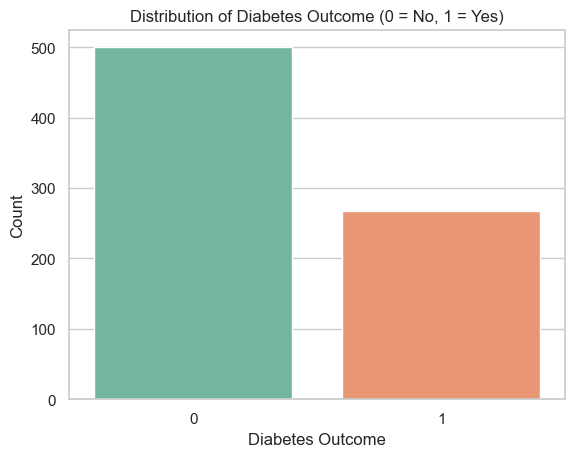

In [18]:
# Bar chart for Outcome variable

sns.countplot(x='Outcome',data=df,palette='Set2')
plt.title("Distribution of Diabetes Outcome (0 = No, 1 = Yes)")
plt.xlabel("Diabetes Outcome")
plt.ylabel("Count")
plt.show()

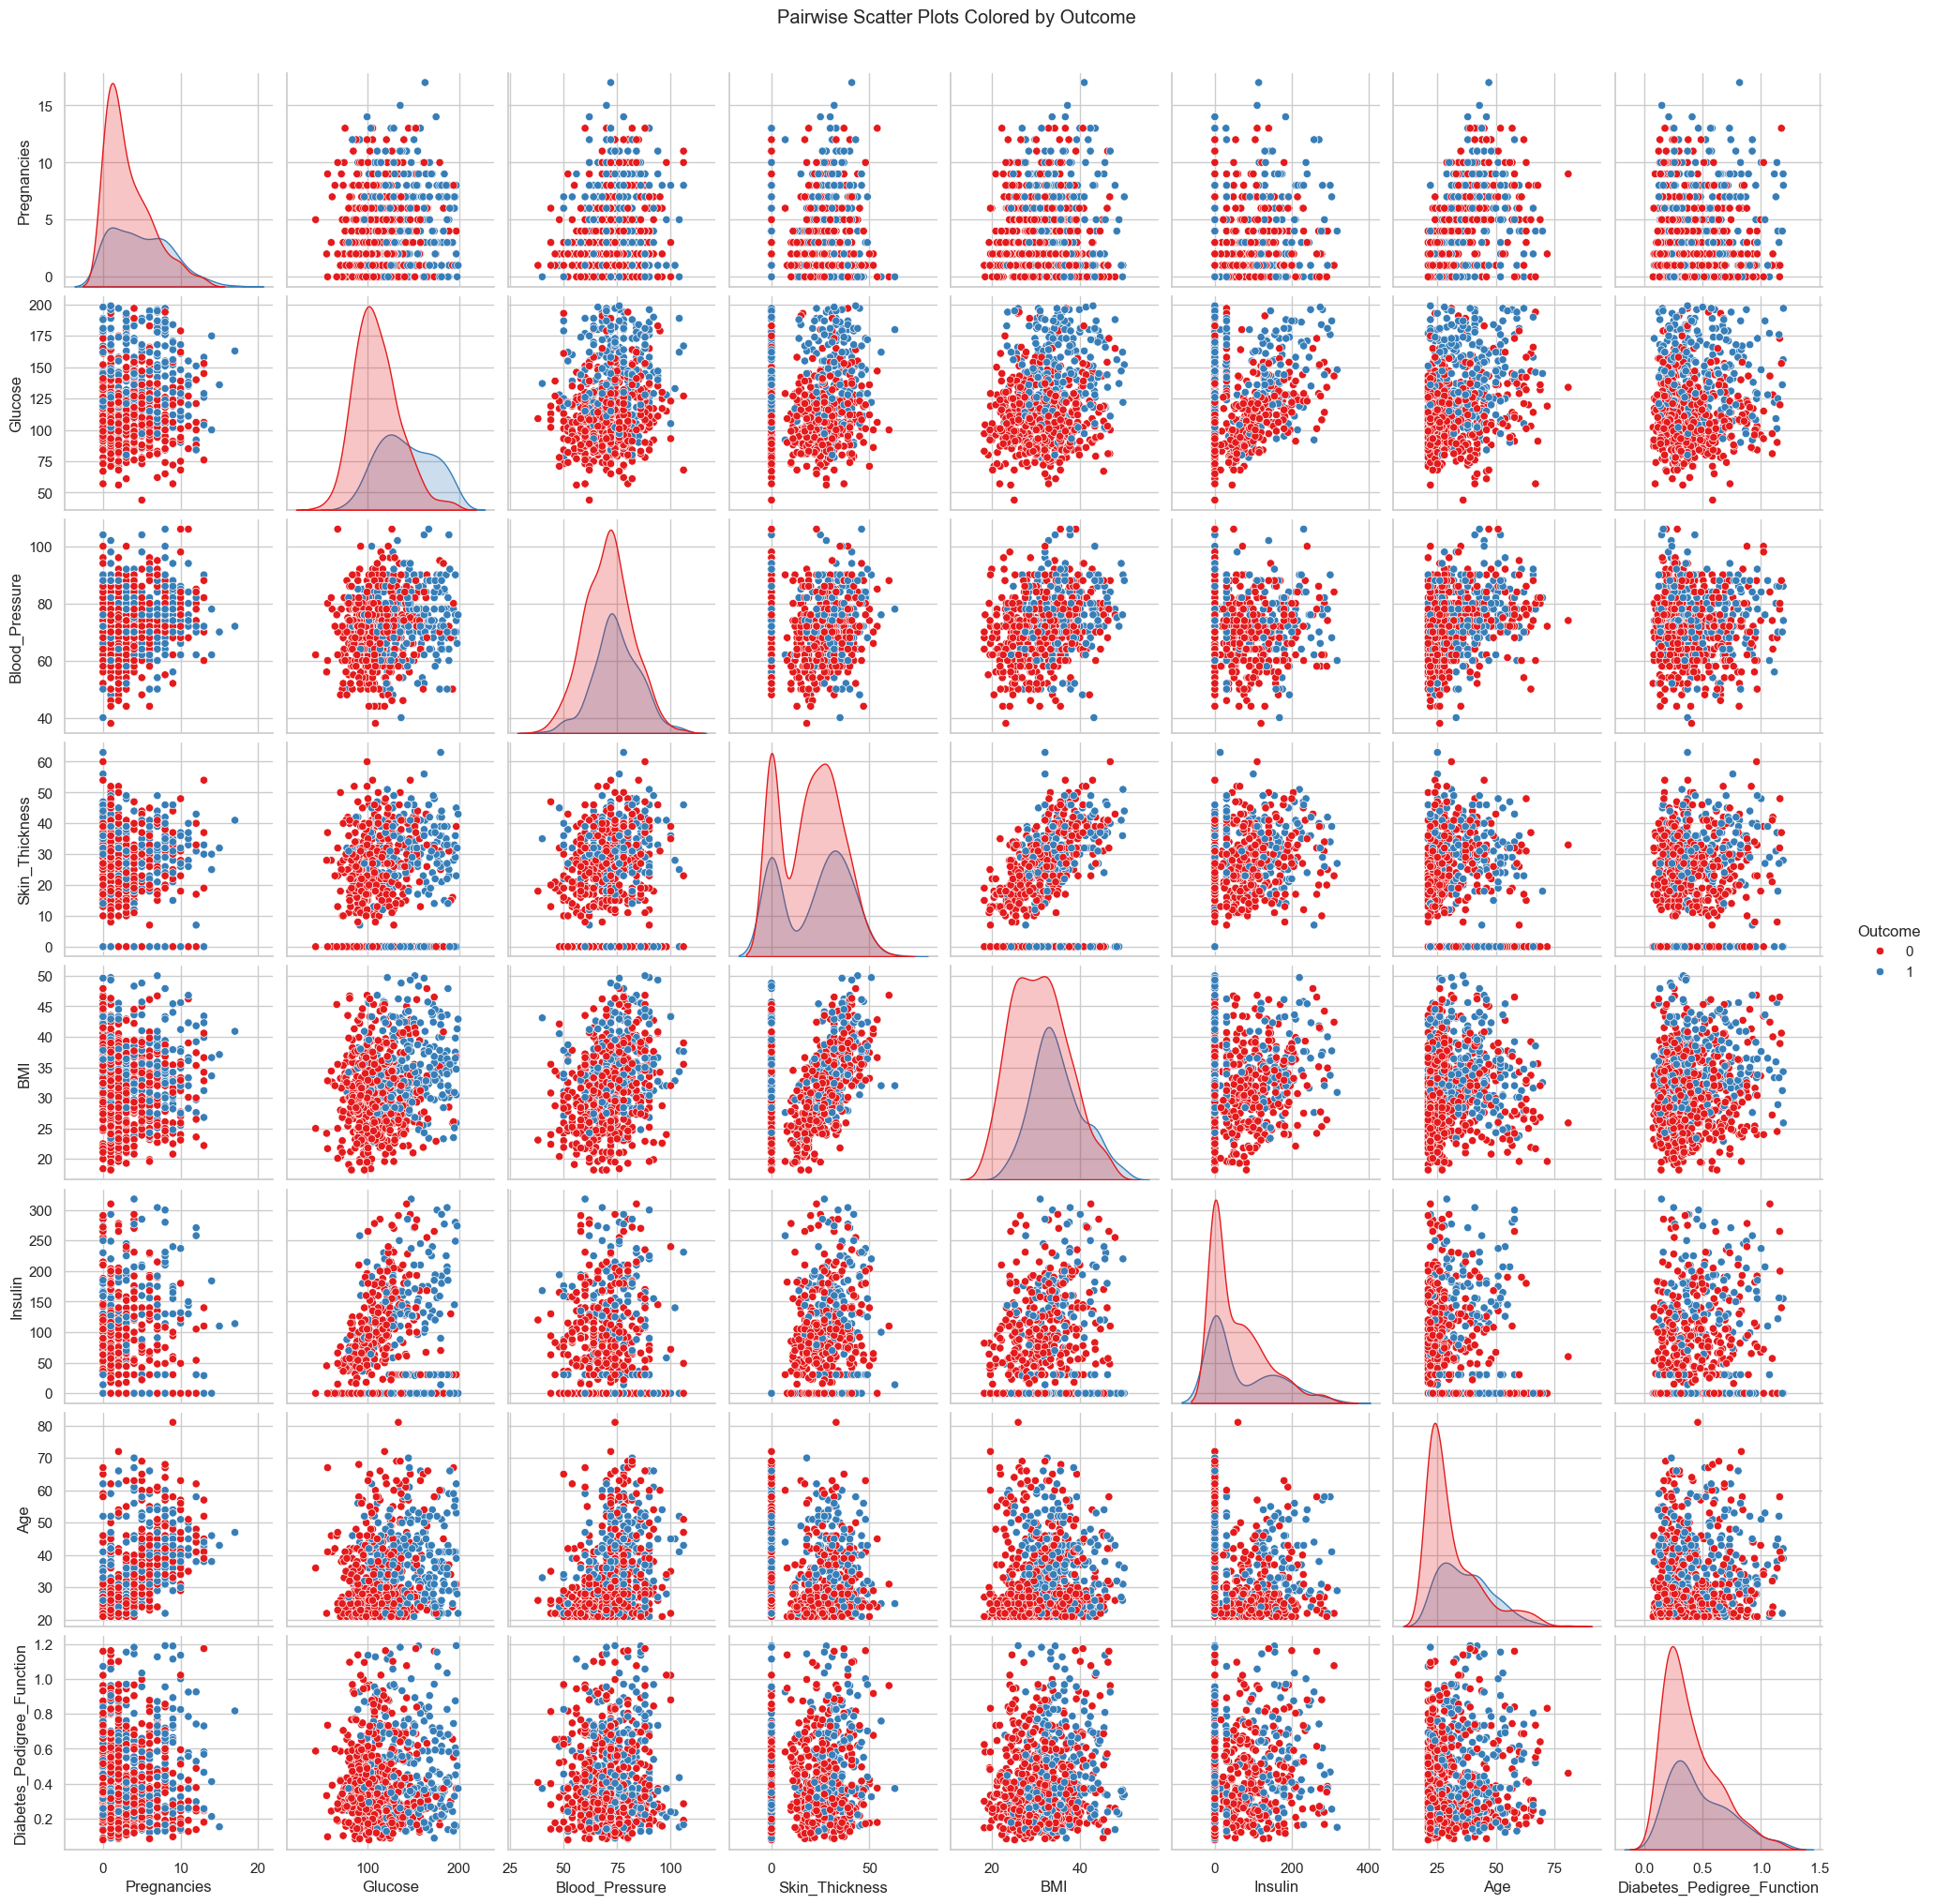

In [19]:
# Pairplot for selected features (to avoid clutter)
selected_features = ['Pregnancies','Glucose','Blood_Pressure','Skin_Thickness', 'BMI', 'Insulin', 'Age', 'Outcome','Diabetes_Pedigree_Function']
sns.pairplot(df[selected_features], hue='Outcome', diag_kind='kde', palette='Set1')
plt.suptitle("Pairwise Scatter Plots Colored by Outcome", y=1.02)
plt.show()

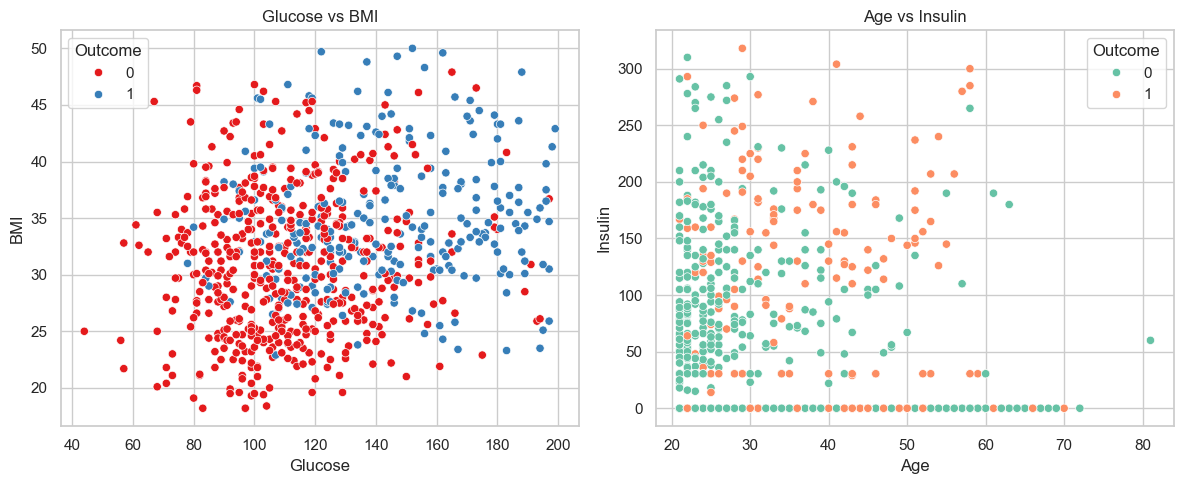

In [20]:
# Scatter plots between selected variables
plt.figure(figsize=(12, 5))

# Glucose vs BMI
plt.subplot(1, 2, 1)
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df, palette='Set1')
plt.title("Glucose vs BMI")

# Age vs Insulin
plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='Insulin', hue='Outcome', data=df, palette='Set2')
plt.title("Age vs Insulin")

plt.tight_layout()
plt.show()


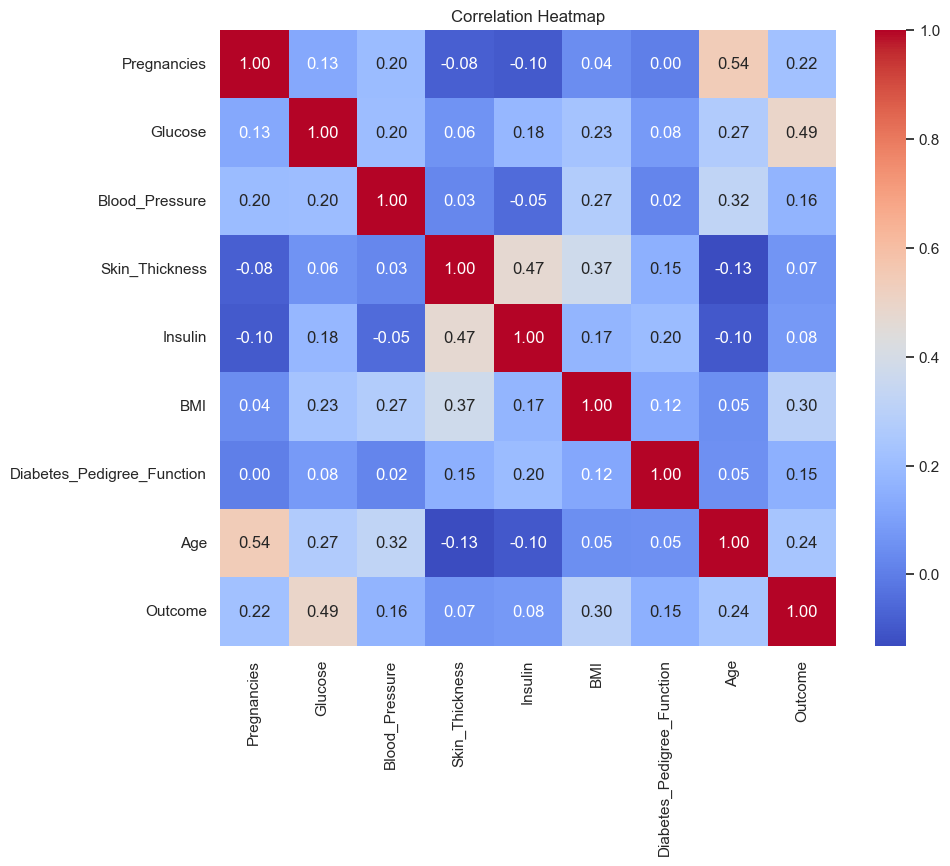

In [21]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()


## *5. Model Building*

### 5.1 Training and Testing Split


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [23]:
len(x_train)

614

In [24]:
len(y_test)

154

###  5.2 Model Training

In [26]:
param_grid= {
    'n_neighbors': np.arange(1, 21), 
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan', 'minkowski']  
}
grid_search=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [41]:
best_parms=grid_search.best_params_
knn_best= grid_search.best_estimator_

print("Best Prarms:",best_params)
print("knn_best grid: ",knn_best)

Best Prarms: {'metric': 'manhattan', 'n_neighbors': np.int64(9), 'weights': 'distance'}
knn_best grid:  KNeighborsClassifier(metric='manhattan', n_neighbors=np.int64(9),
                     weights='distance')


In [50]:
# Predict on the test data
y_test_pred = knn_best.predict(x_test)
y_test_pred[:20]

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [49]:
y_test[:20]

668    0
324    0
624    0
690    0
473    0
204    0
97     0
336    0
568    0
148    0
667    1
212    0
199    1
265    0
760    0
356    1
501    0
457    0
604    1
213    1
Name: Outcome, dtype: int64

Accuracy:  0.7077922077922078
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.77      0.77        99
           1       0.59      0.60      0.59        55

    accuracy                           0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154

Confusion Matrix:
 [[76 23]
 [22 33]]


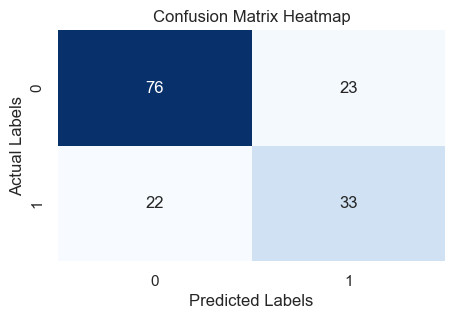

In [55]:
#Model Evaluation
accuracy=accuracy_score(y_test,y_test_pred)
classification_rep=classification_report(y_test,y_test_pred)
confusion_mat=confusion_matrix(y_test,y_test_pred)

print("Accuracy: ", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion_mat)

# Create a heatmap for the confusion matrix

plt.figure(figsize=(5,3))
sns.heatmap(confusion_mat,annot=True,fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

## Analysis of the KNN Model Performance

### 1. **Overall Accuracy**
- The model achieved an **accuracy of 70.77%**, meaning about 71% of the predictions were correct.


### 2. **Class-wise Performance**
- **Class 0 (Majority Class)**:
  - **Precision**: 78% (Reliable predictions for class 0).
  - **Recall**: 77% (Most class 0 samples correctly identified).
  - **F1-Score**: 77% (Good balance between precision and recall).

- **Class 1 (Minority Class)**:
  - **Precision**: 59% (Moderately reliable predictions for class 1).
  - **Recall**: 60% (The model misses many class 1 samples).
  - **F1-Score**: 59% (Needs improvement in balancing precision and recall).

---

### 3. **Macro Average**
- **Precision**: 68%, **Recall**: 68%, **F1-Score**: 68%.
  - Averages performance equally across both classes, showing moderate results.

---

### 4. **Weighted Average**
- Accounts for class imbalance, resulting in **~71% precision, recall, and F1-score**.

---

### Key Observations
- The model performs well for **class 0** but struggles with **class 1** due to **class imbalance**.
- **Recall for class 1 (60%)** is much lower, indicating that many minority class samples are missed